# Task 1: Exploratory Data Analysis and Data Preprocessing

Objective: Understand the structure, content, and quality of the complaint data and prepare it for the RAG pipeline.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add src to path
sys.path.append(os.path.abspath('../src'))
from preprocessing import load_data, filter_data, clean_text, preprocess_pipeline

%matplotlib inline
sns.set_theme(style="whitegrid")

## 1. Load Data

In [2]:
df = load_data('../data/complaints.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (9609797, 18)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


## 2. Initial EDA

### Product Distribution

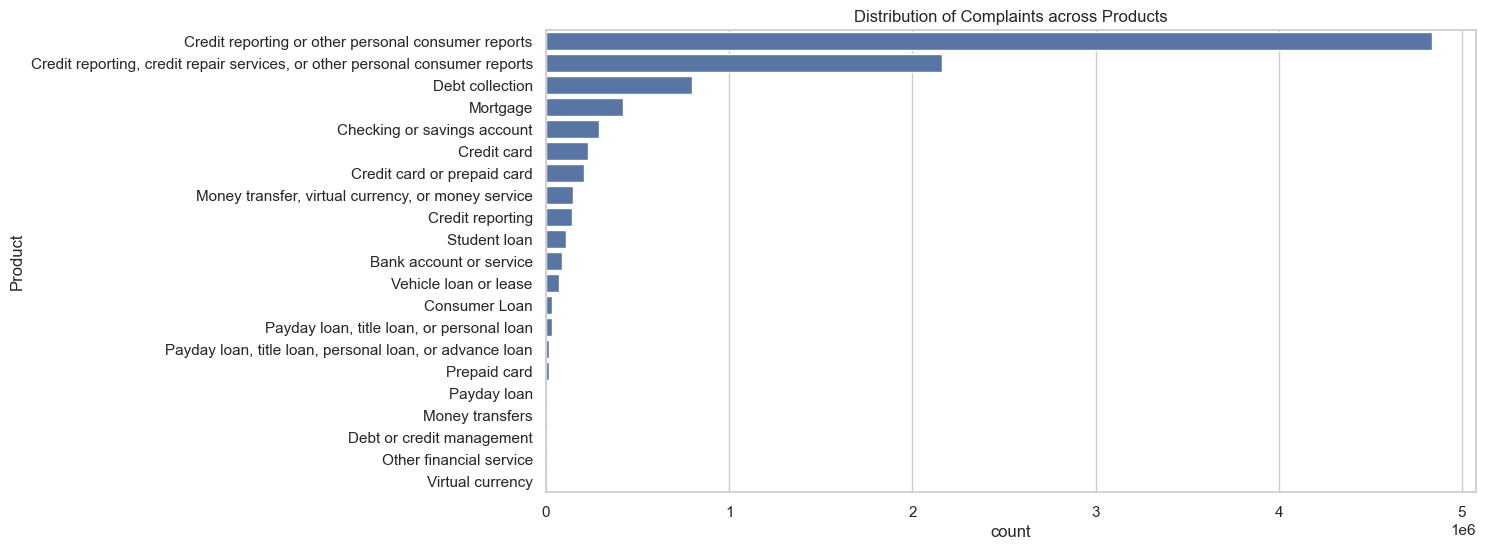

In [3]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Product', data=df, order=df['Product'].value_counts().index)
plt.title('Distribution of Complaints across Products')
plt.show()

### Narrative Presence

Complaints with narrative: 2980756
Complaints without narrative: 6629041


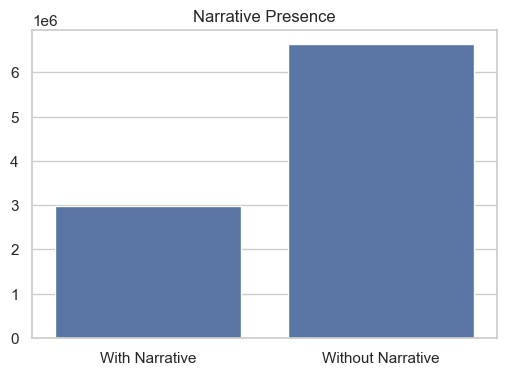

In [4]:
narrative_count = df['Consumer complaint narrative'].notnull().sum()
missing_count = df['Consumer complaint narrative'].isnull().sum()

print(f"Complaints with narrative: {narrative_count}")
print(f"Complaints without narrative: {missing_count}")

plt.figure(figsize=(6, 4))
sns.barplot(x=['With Narrative', 'Without Narrative'], y=[narrative_count, missing_count])
plt.title('Narrative Presence')
plt.show()

### Narrative Length Analysis

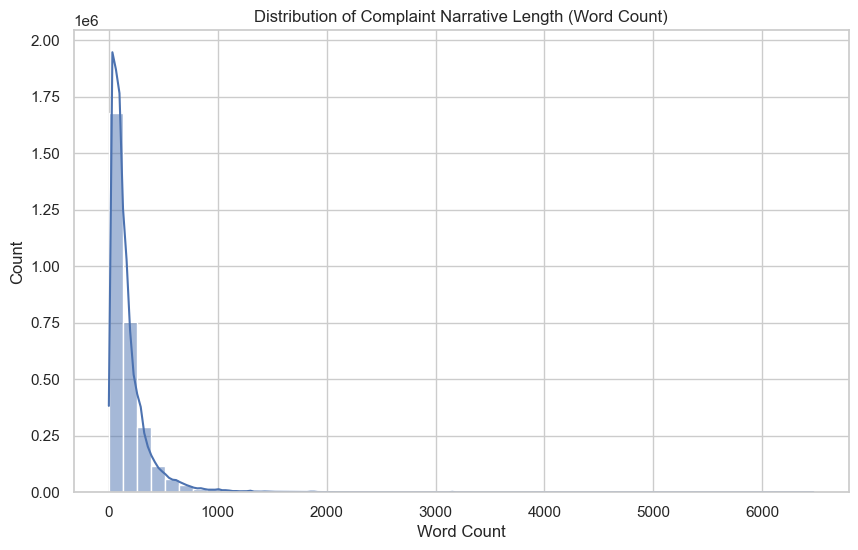

Average word count: 175.60
Median word count: 114.0
Max word count: 6469
Min word count: 1


In [5]:
# Filter for narratives only
narratives = df['Consumer complaint narrative'].dropna()
word_counts = narratives.apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
sns.histplot(word_counts, bins=50, kde=True)
plt.title('Distribution of Complaint Narrative Length (Word Count)')
plt.xlabel('Word Count')
plt.show()

print(f"Average word count: {word_counts.mean():.2f}")
print(f"Median word count: {word_counts.median()}")
print(f"Max word count: {word_counts.max()}")
print(f"Min word count: {word_counts.min()}")

## 3. Filtering and Cleaning

In [6]:
df_filtered = preprocess_pipeline('../data/complaints.csv', '../data/filtered_complaints.csv')
df_filtered.head()

Loading data...
Initial Analysis...
Total complaints: 9609797
Complaints with narrative: 2980756
Filtering data...
Filtered complaints (Target products + non-empty narrative): 82164
Cleaning text...
Saving to ../data/filtered_complaints.csv...
Done!


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,cleaned_narrative
12237,2025-06-13,Credit card,Store credit card,Getting a credit card,Card opened without my consent or knowledge,A XXXX XXXX card was opened under my name by a...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78230,Servicemember,Consent provided,Web,2025-06-13,Closed with non-monetary relief,Yes,NaN,14069121,a xxxx xxxx card was opened under my name by a...
13280,2025-06-12,Credit card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,"Dear CFPB, I have a secured credit card with c...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,11220,NaN,Consent provided,Web,2025-06-13,Closed with monetary relief,Yes,NaN,14047085,", i have a secured credit card with citibank w..."
13506,2025-06-12,Credit card,General-purpose credit card or charge card,Incorrect information on your report,Account information incorrect,I have a Citi rewards cards. The credit balanc...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,60067,NaN,Consent provided,Web,2025-06-12,Closed with explanation,Yes,NaN,14040217,i have a citi rewards cards. the credit balanc...
13955,2025-06-09,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,b'I am writing to dispute the following charge...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78413,Older American,Consent provided,Web,2025-06-09,Closed with monetary relief,Yes,NaN,13968411,bi am writing to dispute the following charges...
14249,2025-06-09,Credit card,General-purpose credit card or charge card,Problem when making payments,Problem during payment process,"Although the account had been deemed closed, I...",Company believes it acted appropriately as aut...,Atlanticus Services Corporation,NY,11212,Older American,Consent provided,Web,2025-06-09,Closed with monetary relief,Yes,NaN,13965746,"although the account had been deemed closed, i..."


### Cleaned Narrative Sample

In [7]:
print("Original:")
print(df_filtered['Consumer complaint narrative'].iloc[0][:200] + "...")
print("\nCleaned:")
print(df_filtered['cleaned_narrative'].iloc[0][:200] + "...")

Original:
A XXXX XXXX card was opened under my name by a fraudster. I received a notice from XXXX  that an account was just opened under my name. I reached out to XXXX XXXX to state that this activity was unaut...

Cleaned:
a xxxx xxxx card was opened under my name by a fraudster. i received a notice from xxxx that an account was just opened under my name. i reached out to xxxx xxxx to state that this activity was unauth...
